## Importing Libreries

In [ ]:
!pip install q keras==2.2.4
!pip install git+https://github.com/qubvel/segmentation_models

In [ ]:
import PIL
import time
import numpy as np
#import albumentations as A                          # best data-augmentation package
import segmentation_models as sm
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


## Test image processing

In [ ]:
pre_processing = sm.get_preprocessing('efficientnetb3')

In [ ]:
def pre_process(img):
    img = np.array(img)
    img = pre_processing(img)
    img = np.expand_dims(img,axis = 0)
    return img

def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)   
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)            # convert the range of array into [0,1]
    return x

def imshow(img):
    image = denormalize(img.squeeze())
    plt.figure(figsize=(9,9))
    plt.imshow(image)
    return

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Create Model**

Apply pre-trained model weights to **U-net** using **segmentation_models** package and save the model with weights in Keras **.h5** format.


In [ ]:
model = sm.Unet(backbone_name='efficientnetb3', weights='/content/drive/My Drive/Hand Detection/seg_hand_trained/best_model.h5')

model.summary()

In [ ]:
model.save('/content/Hand_model.h5')

## **Load Model**

In [ ]:
from tensorflow import nn
from tensorflow.keras.backend import shape
from tensorflow.keras.layers import Dropout


class FixedDropout(Dropout):
    def _get_noise_shape(self, inputs):
        if self.noise_shape is None:
            return self.noise_shape
        return tuple([shape(inputs)[i] if sh is None else sh for i, sh in enumerate(self.noise_shape)])

customObjects = {
    'swish': nn.swish,
    'FixedDropout': FixedDropout
}


hand = load_model('/content/drive/My Drive/Hand Detection/Final_Hand_model.h5', custom_objects=customObjects)

In [ ]:
img = PIL.Image.open('/content/drive/My Drive/hand_images/2.jpg').resize((320,320))
img = pre_process(img)

In [ ]:
start = time.time()
pred = hand.predict(img)
print('Prediction time : ', time.time()-start)

Prediction time :  0.06862926483154297


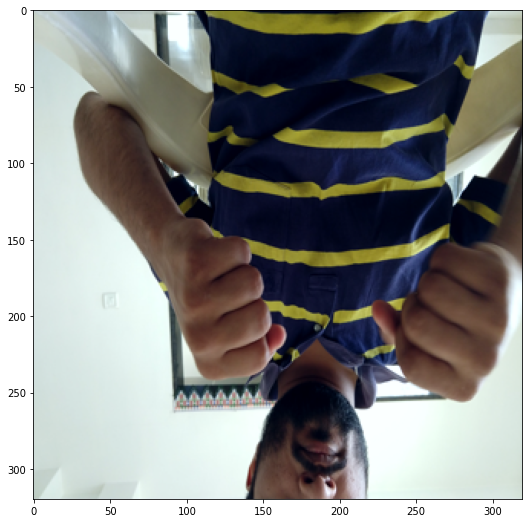

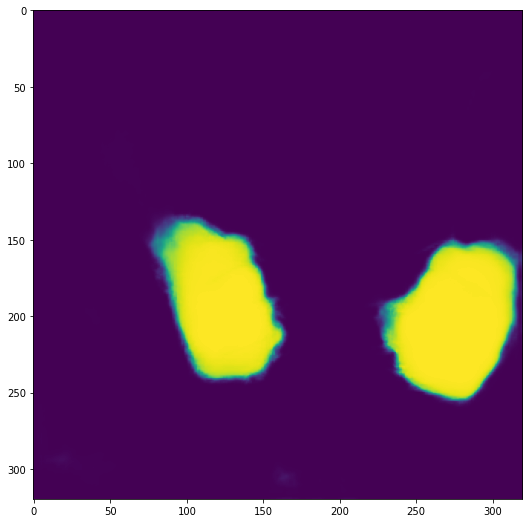

In [ ]:
imshow(img)
imshow(pred)

In [ ]:
image = denormalize(pred.squeeze())

plt.imshow(image)

plt.colorbar()